In [ ]:
# %pip install ultralytics opencv-python

In [1]:
import os
import torch
from ultralytics import YOLO


In [2]:
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

Torch: 2.5.1+cu121
CUDA available: True
GPU: Quadro P4200


In [3]:
import os

for root, dirs, files in os.walk("rice_dataset"):
    print(root, "->", len(files))


rice_dataset -> 3
rice_dataset\test -> 0
rice_dataset\test\images -> 42
rice_dataset\test\labels -> 42
rice_dataset\train -> 0
rice_dataset\train\images -> 285
rice_dataset\train\labels -> 285
rice_dataset\valid -> 0
rice_dataset\valid\images -> 80
rice_dataset\valid\labels -> 80


In [4]:
yaml_content = """
path: ./rice_dataset

train: train/images
val: valid/images
test: test/images

nc: 3
names: ['1509', 'IRRI-6', 'Super_White']
"""

with open("rice_dataset/rice.yaml", "w") as f:
    f.write(yaml_content)

print("✅ rice.yaml ready")


✅ rice.yaml ready


In [5]:
model = YOLO("yolov8m-seg.pt")
model.info()

YOLOv8m-seg summary: 191 layers, 27,285,968 parameters, 0 gradients, 105.0 GFLOPs


(191, 27285968, 0, 104.98401279999999)

In [7]:
results = model.train(
    data="rice_dataset/rice.yaml",
    
    epochs=150,        # good for small dataset
    imgsz=1024,        # VERY IMPORTANT (small objects)
    batch=8,           # fits your GPU
    device=0,
    workers=4,

    optimizer="AdamW",
    lr0=0.001,

    project="rice_yolo_runs",
    name="yolov8m_seg",

    pretrained=True,
    patience=30,

    overlap_mask=True,
    warmup_epochs=3,     # smoother start
    save_period=25,
    # resume=True
)


Ultralytics 8.4.9  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (Quadro P4200, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=rice_dataset/rice.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8m_seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=30, perspecti

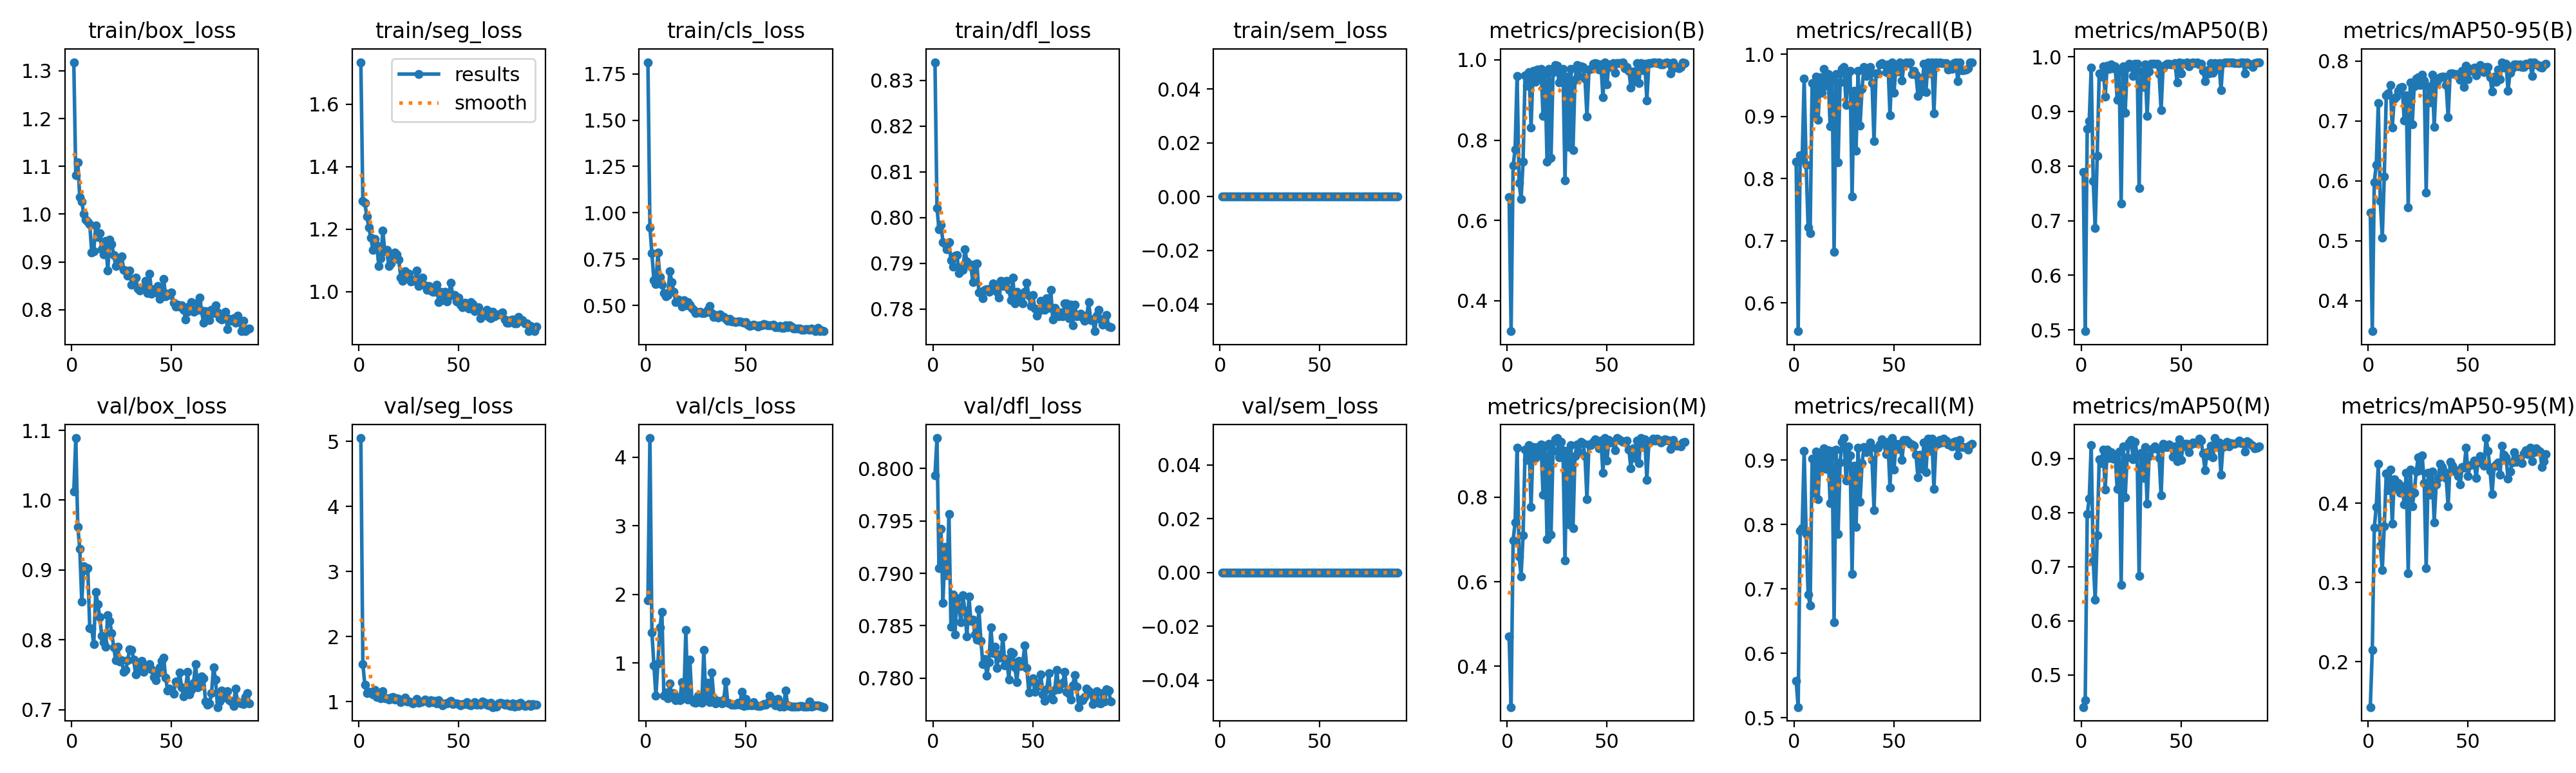

In [10]:
from IPython.display import Image

Image("runs/segment/rice_yolo_runs/yolov8m_seg/results.png")


In [11]:
best_model = YOLO("runs/segment/rice_yolo_runs/yolov8m_seg/weights/best.pt")

best_model.predict(
    source="rice_dataset/test/images",
    save=True,
    # conf=0.25
)



image 1/42 d:\FYP\Code\rice_dataset\test\images\IMG_0020_JPG.rf.64011911b5ea8541f3a78bf54845db23.jpg: 1024x1024 30 IRRI-6s, 31 Super_Whites, 205.7ms
image 2/42 d:\FYP\Code\rice_dataset\test\images\IMG_0022_JPG.rf.0284eb935b698df8c3d54bc268cfeefb.jpg: 1024x1024 30 IRRI-6s, 31 Super_Whites, 214.4ms
image 3/42 d:\FYP\Code\rice_dataset\test\images\IMG_0032_JPG.rf.d0dd585df7fceb50464fe73b9110dd39.jpg: 1024x1024 30 IRRI-6s, 31 Super_Whites, 264.1ms
image 4/42 d:\FYP\Code\rice_dataset\test\images\IMG_0086_JPG.rf.15e9b91108c3b883ceed2f3326e780d7.jpg: 1024x1024 22 1509s, 24 IRRI-6s, 27 Super_Whites, 177.4ms
image 5/42 d:\FYP\Code\rice_dataset\test\images\IMG_0087_JPG.rf.9bcda643f7f966ef295f2e4f7cdc9139.jpg: 1024x1024 22 1509s, 24 IRRI-6s, 27 Super_Whites, 860.9ms
image 6/42 d:\FYP\Code\rice_dataset\test\images\IMG_0100_JPG.rf.ab7ceaab6857c6e97c6cc436a4a17713.jpg: 1024x1024 22 1509s, 24 IRRI-6s, 27 Super_Whites, 898.9ms
image 7/42 d:\FYP\Code\rice_dataset\test\images\IMG_0107_JPG.rf.77c6e486aa2

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '1509', 1: 'IRRI-6', 2: 'Super_White'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 

In [12]:
metrics = best_model.val()
print(metrics)


Ultralytics 8.4.9  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (Quadro P4200, 8192MiB)
val: Fast image access  (ping: 0.30.0 ms, read: 32.12.7 MB/s, size: 301.9 KB)
val: Scanning D:\FYP\Code\rice_dataset\valid\labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 80/80  0.0s
val: D:\FYP\Code\rice_dataset\valid\images\IMG_0089_JPG.rf.79de56928f99a5c62389ec04782abeb2.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 19.8s/it 1:3925.7s
                   all         80       6095      0.979      0.969      0.986      0.812      0.912      0.904      0.914      0.424
                  1509         50       2156      0.949      0.985       0.98      0.822      0.904      0.939      0.938      0.475
                IRRI-6         40       1752      0.996      0.987      0.989      0.812      0.925      0.917      0.911      0.414
           Su

In [ ]:
metrics_test = best_model.val(data="rice_dataset/data.yaml", split="test")
print(metrics_test)

Ultralytics 8.4.9  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (Quadro P4200, 8192MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 1262.1293.9 MB/s, size: 292.3 KB)
val: Scanning D:\FYP\Code\rice_dataset\test\labels... 42 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 42/42 304.2it/s 0.1s.1s
val: New cache created: D:\FYP\Code\rice_dataset\test\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 20.6s/it 1:02<43.3s
                   all         42       3240      0.979       0.97      0.987      0.818      0.922      0.909      0.923      0.433
                  1509         20        829      0.943      0.992       0.99      0.841      0.904      0.943      0.943      0.472
                IRRI-6         21       1048      0.999      0.977      0.983      0.815      0.948      0.926      0.935      0.431
           Super_White         24       1363      0.995     